# *Banking Customer Churn Prediction*

![logo](images/logo.jpg)

## Introdução

O objetivo deste projeto é desenvolver um modelo de *machine learning* que seja capaz de identificar se um cliente de um determinado banco está, ou não, em risco de terminar a sua ligação com o mesmo.

O modelo deve ser treinado e testado com recurso a um *dataset* disponibilizado no *Kaggle* (https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset), que contém informações sobre os clientes de um banco, como o saldo e o número de produtos, por exemplo, bem como se o cliente abandonou, ou não, o banco, sendo esta a variável-alvo do problema em questão.

A abordagem para extrair conhecimento a partir dos dados consistirá numa adaptação da metodologia CRISP-DM (*Cross-Industry Standard for Data Mining*), dividindo, assim, o processo de mineração de dados em cinco fases: (1) compreensão do tema, (2) compreensão dos dados, (3) preparação dos dados, (4) modelação e (5) avaliação.

### Estrutura

O projeto está organizado da seguinte forma:

* ***code.ipynb***: *Jupyter Notebook* com o código do modelo desenvolvido
* ***data.csv***: *dataset* utilizado para treino e para teste do modelo
* ***README.md***: ficheiro com instruções de execução e utilização do modelo

### Tecnologias

Para o desenvolvimento do projeto, será utilizada a linguagem de programação *Python*, com recurso às seguintes bibliotecas:

* *Matplotlib*, para visualizar os dados
* *NumPy*, para tratar os dados numéricos
* *Pandas*, para manipular os dados
* *Seaborn*, para visualizar os dados
* *Scikit-Learn*, para desenvolver os modelos de *machine learning*

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

warnings.filterwarnings('ignore')

## 1. Compreensão do Tema

### Objetivos do Tema

Um banco é uma instituição financeira cuja principal atividade consiste em receber depósitos dos seus clientes e conceder-lhes créditos.

Por isso, os clientes são essenciais para a existência e o funcionamento de um banco, sendo eles os elementos mais importantes para estas entidades. Assim, torna-se crucial ser capaz de reter os clientes associados a um determinado banco, evitando, se possível, que eles terminem uma ligação já existente.

Para isto, afigura-se extremamente útil para qualquer banco conseguir prever, com exatidão, se um cliente está em risco de o abandonar, de modo que, antecipadamente, seja possível encetar os esforços necessários para que essa decisão do cliente seja reconsiderada, mantendo-o associado ao banco em questão.

### Definição do Problema

O problema consiste em prever se um cliente está, ou não, em risco de terminar a sua ligação com o banco, ou seja, abandonar o banco, tendo como base um conjunto de dados associados ao cliente e conhecidos pelo banco.

### Objetivos do Modelo

O problema em questão reside em classificar cada cliente do banco como pertencente a um de dois grupos, mutuamente exclusivos: em risco de abandonar o banco ou não em risco de abandonar o banco.

Para solucionar o problema, deve ser desenvolvido um modelo de *machine learning* com capacidade para efetuar uma classificação binária que distinga os dois casos possíveis para cada cliente.

Pretende-se que o modelo, devidamente treinado seguindo uma abordagem de *supervised learning*, tenha uma exatidão de 85% a classificar os dados de teste, considerando-se, nesse caso, garantida a sua viabilidade prática.

## 2. Compreensão dos Dados

### Dados Iniciais

O *dataset* fornecido contém 10000 linhas e 14 colunas. 

Cada linha representa um cliente do banco e as colunas são as seguintes:
1. **RowNumber**: número sequencial da linha
2. **CustomerId**: identificador único do cliente
3. **Surname**: apelido do cliente
4. **CreditScore**: pontuação do crédito do cliente
5. **Geography**: país de origem do cliente
6. **Gender**: género do cliente
7. **Age**: idade do cliente (em anos)
8. **Tenure**: tempo de ligação do cliente com o banco (em anos)
9. **Balance**: saldo da conta de cliente (em euros)
10. **NumOfProducts**: número de produtos do banco que o cliente possui
11. **HasCrCard**: indica se o cliente tem cartão de crédito (1 - tem cartão de crédito; 0 - não tem cartão de crédito)
12. **IsActiveMember**: indica se o cliente é um membro ativo (1 - é um membro ativo; 0 - não é um membro ativo)
13. **EstimatedSalary**: salário anual estimado do cliente (em euros)
14. **Exited**: indica se o cliente abandonou o banco (1 - abandonou o banco; 0 - não abandonou o banco)

In [2]:
data = pd.read_csv('data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As colunas *CreditScore*, *Tenure*, *Balance*, *NumOfProducts*, *HasCrCard*, *IsActiveMember* e *EstimatedSalaray* parecem ser aquelas mais relevantes para determinar o valor da variável-alvo (*Exited*), por serem as que mais se relacionam com o banco e com aspetos financeiros do cliente.

Em sentido inverso, os atributos *RowNumber*, *CustomerId* e *Surname* deverão ser completamente irrelevantes para o modelo, por serem meramente indicativos. Por isso, estas colunas poderão vir a ser eliminadas numa próxima fase.

Tendo em conta que existe um número bastante elevado de clientes (10000, que serão divididos em conjuntos de treino e de teste), é crível que será possível extrair conclusões pertinentes dos dados, ou seja, fazer previsões/classificações acertadas, pelo que não se afigura necessário procurar novos dados.

A par disto, o número de atributos considera-se adequado para o problema a tratar e, sendo os dados provenientes de uma só origem, não se vislumbram quaisquer problemas de compatibilidade/coerência.

Finalmente, caso se venham a identificar linhas com valores em falta e/ou incorretos, esses casos serão analisados individualmente: se possível, os valores serão corrigidos, senão, as linhas serão eliminadas, dado que o número total de linhas é suficiente para a criação de um bom modelo.

### Descrição dos Dados

A quantidade de dados atualmente existentes (10000 linhas e 14 colunas) é adequada para o modelo pretendido, permitindo o desenvolvimento de um modelo simultaneamente eficaz (em termos de precisão) e eficiente (em termos de tempo de processamento).

Os tipos dos valores são os seguintes:
1. **RowNumber**: numérico - número inteiro
2. **CustomerId**: númerico - número inteiro
3. **Surname**: categórico - *string*
4. **CreditScore**: numérico - número inteiro
5. **Geography**: categórico - *string*
6. **Gender**: categórico - *string*
7. **Age**: numérico - número inteiro
8. **Tenure**: numérico - número inteiro
9. **Balance**: numérico - número decimal
10. **NumOfProducts**: numérico - número inteiro
11. **HasCrCard**: booleano
12. **IsActiveMember**: booleano
13. **EstimatedSalary**: numérico - número decimal
14. **Exited**: booleano

Nas colunas booleanas, o esquema de codificação consiste em representar "verdadeiro"/"sim" como 1 e "falso"/"não" como 0. A restantes colunas não estão codificadas.

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ao realizar uma análise estatística descritiva sobre os dados, observando as contagens, a média, o desvio padrão, os extremos (mínimo e máximo) e os quartis (incluindo a mediana) dos valores presentes em cada coluna, constatam-se os seguintes factos:
* As pontuações de crédito variam entre 350 e 850;
* Não existem clientes com menos de 18 anos, nem com mais de 92 anos;
* A duração da ligação dos clientes ao banco nunca é superior a 10 anos;
* Existe pelo menos um quarto dos clientes com saldo nulo, havendo uma grande variância/variabilidade dos valores presentes nesta coluna;
* A maior parte dos clientes tem menos de 2 produtos do banco e nenhum cliente possui mais do que 4 produtos;
* A maioria dos clientes (cerca de 70%) tem cartão de crédito;
* Aproximadamente metade dos clientes são considerados membros ativos, enquanto a outra metade não o é;
* A coluna com o salário estimado dos clientes tem uma amplitude significativa;
* No *dataset* considerado, apenas 20% dos clientes abandonou o banco.

Assim, é possível extrair as seguintes conclusões:
* O *dataset* não é equilibrado, dado que a variável-avo (*Exited*) não divide os clientes em dois grupos aproximadamente iguais, mas sim num grupo com cerca de 2000 clientes e noutro com cerca de 8000 (4 vezes maior);

### Qualidade dos Dados

Nas células de código desta secção, pretende-se procurar e identificar erros nos dados, sejam valores em falta, sejam erros de codificação ou medição, sejam inconsistências, entre outros.

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Conforme é possível verificar através do código executado, o *dataset* não contem valores nulos nem N/A, pelo que não existem valores em falta.

In [7]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
data['HasCrCard'].unique()

array([1, 0], dtype=int64)

In [11]:
data['IsActiveMember'].unique()

array([1, 0], dtype=int64)

In [12]:
data['Exited'].unique()

array([1, 0], dtype=int64)

Através da descrição dos dados anteriormente efetuada e da análise de valores únicos em cada coluna, também é possível constatar que:
* O intervalo de valores para as pontuações de crédito, [350, 850], é o padrão para esta métrica;
* Não existe nenhum cliente menor de idade (com menos de 18 anos);
* Os valores dos atributos *Tenure* e *NumOfProducts*, ao variarem, respetivamente, de 0 a 10 e de 1 a 4, são todos plausíveis;
* Nenhuma célula numérica tem um valor negativo, o que seria impossível, qualquer que fosse o atributo em causa;
* As colunas categóricas não contêm erros de codificação, dado que *Geography* só toma os valores "France", "Spain" e "Germany", enquanto *Gender* só é "Male" ou "Female";
* Os atributos booleanos assumem unicamente os valores 0 e 1, tal como esperado;

Tudo isto indica que não existem erros de medição nem inconsistências de valores/codificação nos dados constantes do *dataset* fornecido, visto que todos os valores são plausíveis e não só não existe ruído, como também não existem desvios significativos em relação aos valores considerados aceitáveis para cada coluna.

Para além disto, infere-se também que os nomes das colunas transmitem corretamente o significado dos atributos que representam.

Na fase de preparação dos dados, serão excluídas as colunas *RowNumber*, *CustomerId* e *Surname* por serem irrelevantes para o caso a tratar, conforme já explicitado.

### Exploração dos Dados

Nesta fase, desenham-se os gráficos para as colunas consideradas relevantes, tendo em vista a extração de novas conclusões.

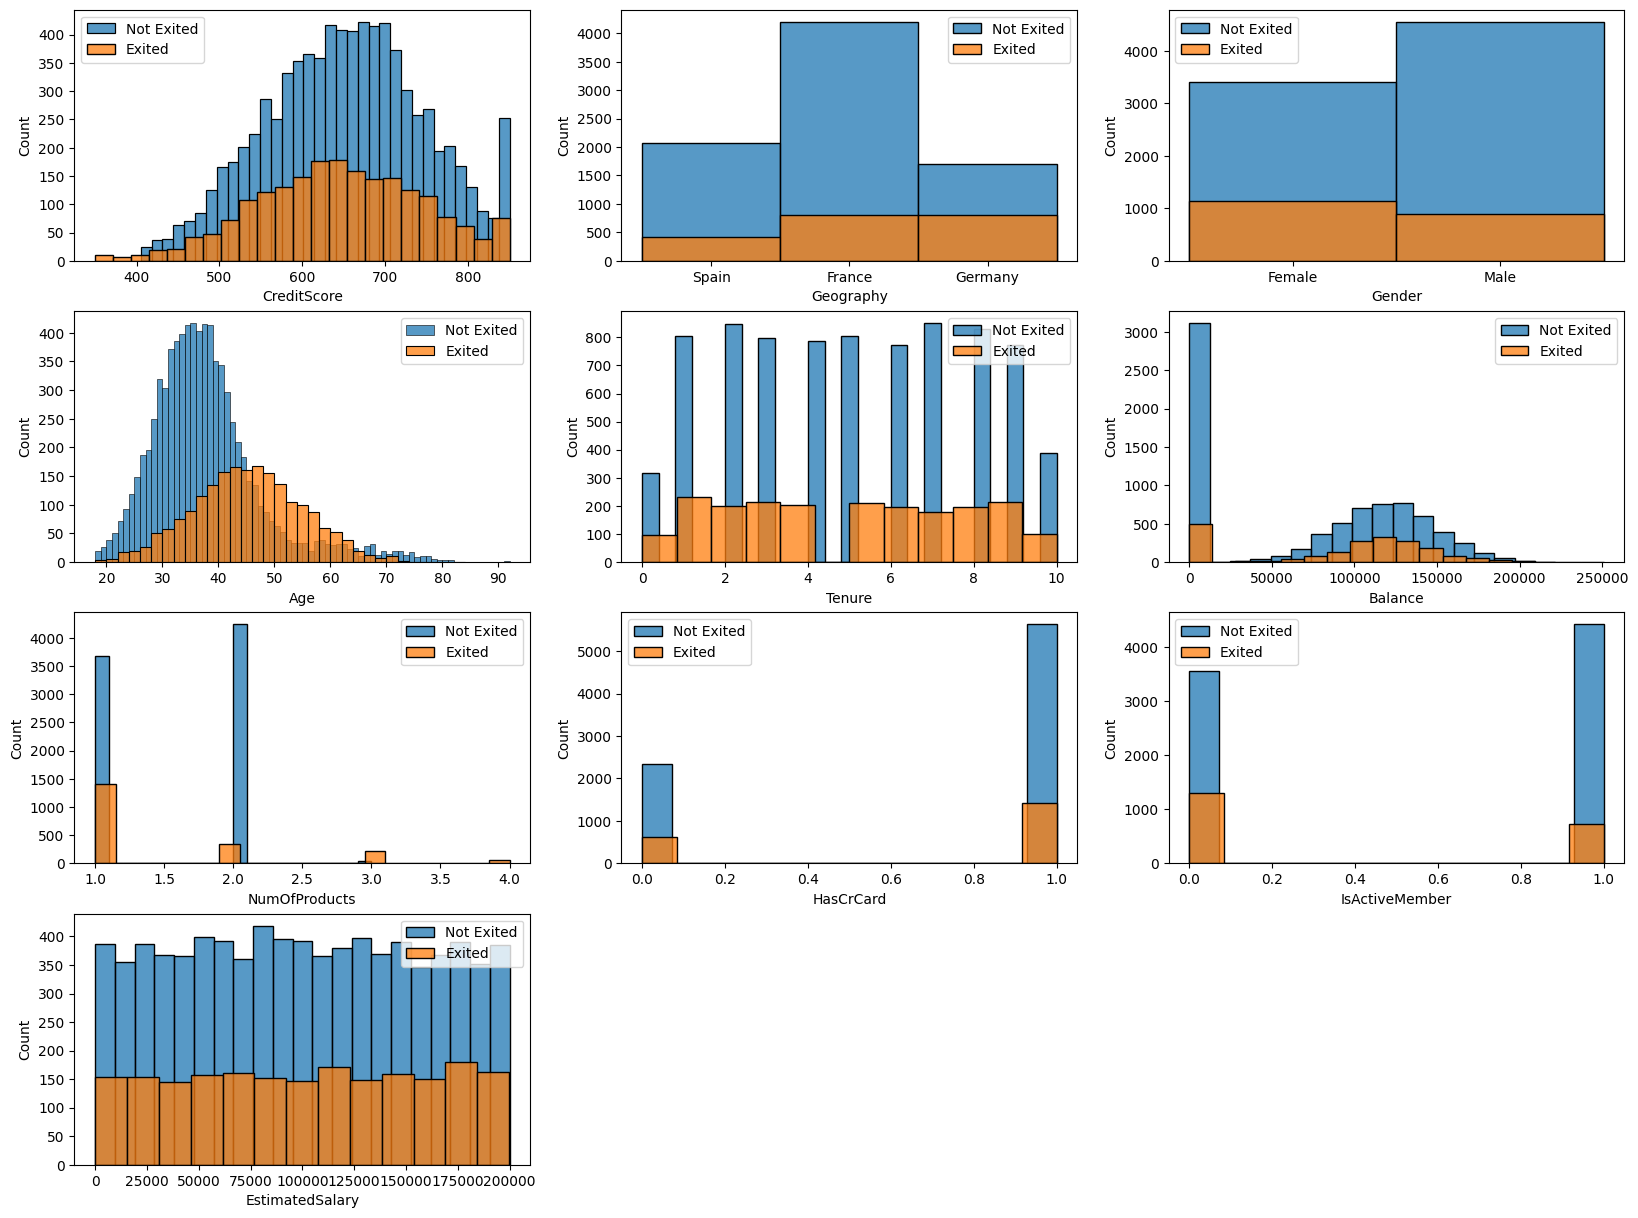

In [13]:
plt.figure(figsize = (20, 15))

not_exited = data[data['Exited'] == 0].drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)
exited = data[data['Exited'] == 1].drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

for i, col in enumerate(not_exited.columns):
    plt.subplot(4, 3, i + 1)
    sb.histplot(data = not_exited[col], label = 'Not Exited')
    sb.histplot(data = exited[col], label = 'Exited')
    plt.legend(plt.gca().get_legend_handles_labels()[1])

Ao observar os histogramas traçados, salientam-se os seguintes aspetos:
* Não parece existir uma relação direta entre os valores das colunas *CreditScore*, *Tenure*, *Balance* e *EstimatedSalary* com o valor da variável-alvo, dado que as distribuições de ambos os grupos (*Exited* e *Not Exited*) são aproximadamente uniformes, tendo valores semelhantes para a média e variância;
* Parece que os clientes de nacionalidade alemã (*Germany*) têm maior tendência para abandonar o banco, em comparação proporcional com os clientes de outras nacionalidades (*Spain* e *France*);
* Apesar de existirem menos clientes mulheres (*Female*) do que homens (*Male*), há mais mulheres do que homens a terminarem a sua relação com o banco;
* Os clientes que tendem a permanecer no banco têm uma idade média consideravelmente inferior à idade dos clientes que saem do banco, o que pode indicar que este atributo terá mais importância do que a anteriormente prevista;
* Os clientes com exatamente dois produtos subscritos são aqueles que mais permanecem no banco;
* O atributo *HasCrCard* parece, afinal, não ser tão relevante quanto esperado, dado que, independentemente de os clientes terem - ou não - cartão de crédito, abandonam o banco na mesma proporção, aproximadamente;
* Não ser um membro ativo do banco aparenta ser um indicador significativo de que a ligação com o banco está em maior risco de terminar. 

Separando as variáveis de acordo com os valores que os seus atributos podem assumir, é possível confirmar as conclusões anteriormente explicitadas e ainda inferir mais alguns detalhes.

<Figure size 1500x1500 with 0 Axes>

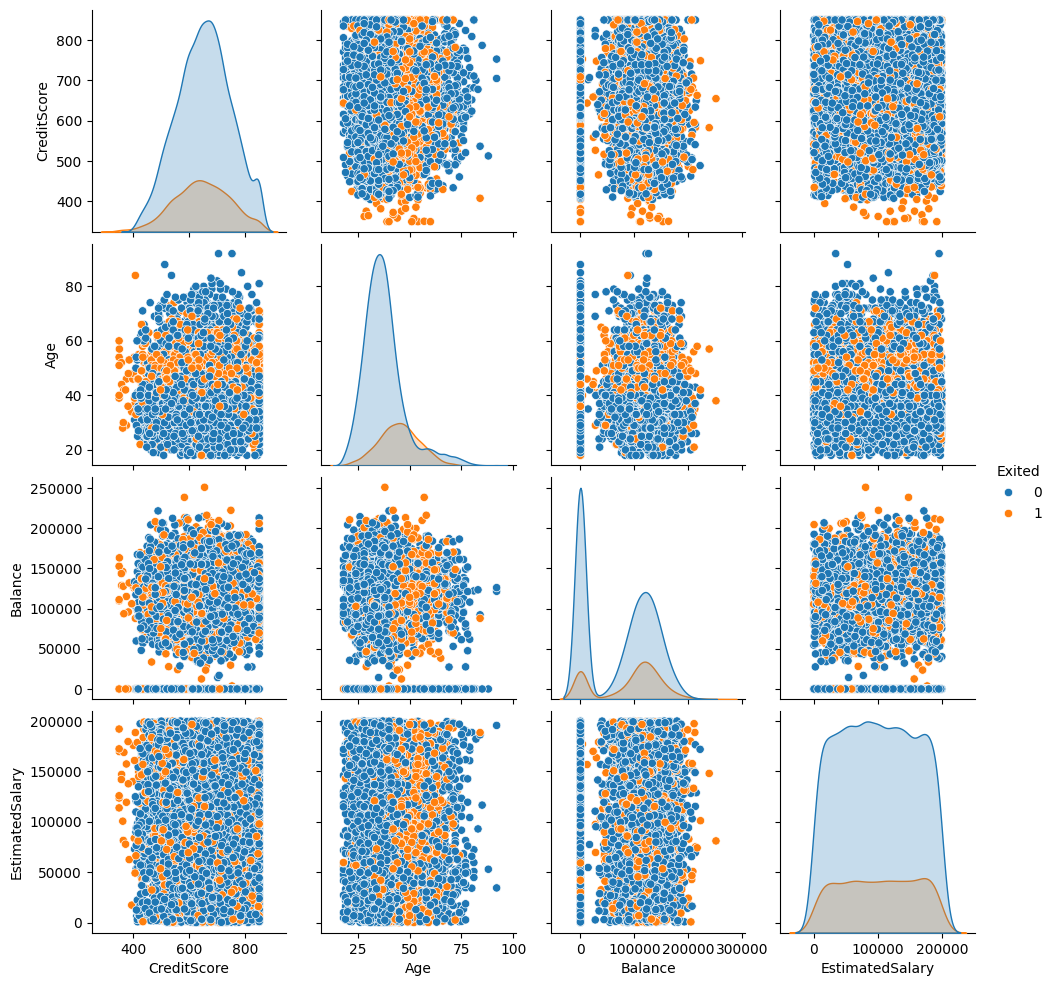

In [14]:
columns = data.columns.drop(['RowNumber', 'CustomerId', 'Surname'])
continuous = [col for col in columns if (data[col].nunique() > 11 or col == 'Exited')]

plt.figure(figsize = (15, 15))
sb.pairplot(data[continuous], hue='Exited')

Os gráficos acima confirmam que, independentemente de outros fatores, a faixa etária que mais frequentemente termina a sua ligação com o banco ronda os 50 anos. A par disto, observa-se também uma ligeira tendência para os clientes com menores pontuações de crédito abandonarem o banco.

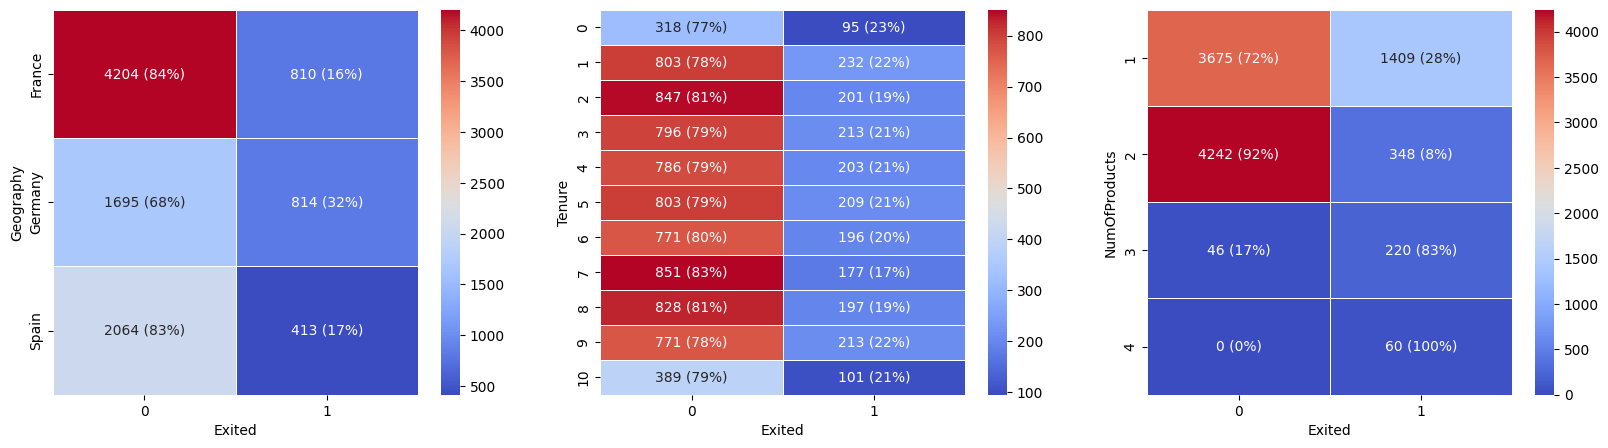

In [15]:
non_binary = [col for col in columns if data[col].nunique() > 2 and data[col].nunique() <= 11]

plt.figure(figsize = (20, 5))
for (i, column) in enumerate(non_binary):
    plt.subplot(1, 3, i + 1)
    table = pd.crosstab(data[column], data['Exited'])
    row_sum = table.sum(axis = 1)
    percentages = (table.T / row_sum * 100).T
    annotations = [['{} ({}%)'.format(count, round(percentage)) for percentage, count in zip(row, table_row)] for table_row, row in zip(table.values, percentages.values)]
    sb.heatmap(table, annot = annotations, fmt = '', cmap = 'coolwarm', linewidths=.5)

As tabelas acima mostram as frequências absoluta e relativa (dentro de cada linha), detalhando aspetos já observados nos histogramas e acrescentando novas informações.

Em primeiro lugar, mostra-se que, efetivamente, existe uma maior tendência de os clientes alemães abandonarem o banco e, em segundo lugar, não se observa nenhuma correlação representativa entre a coluna *Tenure* e a variável-alvo. Ambas estas conclusões já haviam sido retiradas da análise dos histogramas iniciais.

Finalmente, ao detalhar o retratado no histograma para a variável *NumOfProducts*, constata-se que todos os clientes que possuem 4 produtos do banco abandonam o banco e que, daqueles que possuem exatamente 3 produtos, a grande maioria também termina a sua ligação com o banco. Esta observação contradiz a hipótese inicial de que um menor número de produtos do banco poderia indicar uma maior propensão para abandonar o banco, mostrando exatamente o oposto.

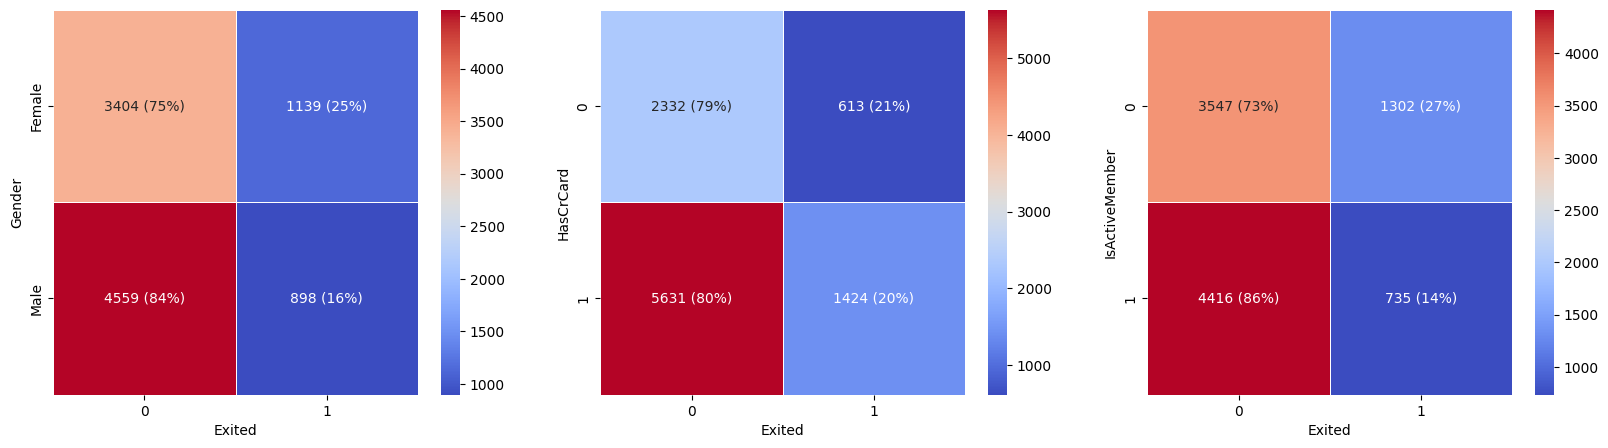

In [16]:
binary = [col for col in columns if data[col].nunique() == 2 and col != 'Exited']

plt.figure(figsize = (20, 5))
for (i, column) in enumerate(binary):
    plt.subplot(1, 3, i + 1)
    table = pd.crosstab(data[column], data['Exited'])
    row_sum = table.sum(axis = 1)
    percentages = (table.T / row_sum * 100).T
    annotations = [['{} ({}%)'.format(count, round(percentage)) for percentage, count in zip(row, table_row)] for table_row, row in zip(table.values, percentages.values)]
    sb.heatmap(table, annot = annotations, fmt = '', cmap = 'coolwarm', linewidths=.5)

Tabelas análogas às anteriores para as variáveis binárias permitem reforçar a informação extraída inicialmente.

Quanto ao género, a proporção de mulheres a abandonar o banco é superior à de homens, mas esta diferença não parece, por si só, ser significativa o suficiente para ser determinante na classificação a efetuar pelo modelo.

No que diz respeito a ter, ou não, cartão de crédito, contrariamente ao que seria de esperar, este facto mostra-se absolutamente irrelevante para aferir a probabilidade de terminar a ligação com o banco, dado que os clientes que têm cartão de crédito abandonam o banco na mesma proporção do que aqueles que não têm esse cartão.

Por último, tal como já observado, confirma-se que, se um cliente for um membro ativo, então esse é um indicador de que é mais provável permanecer ligado ao banco.

<Axes: >

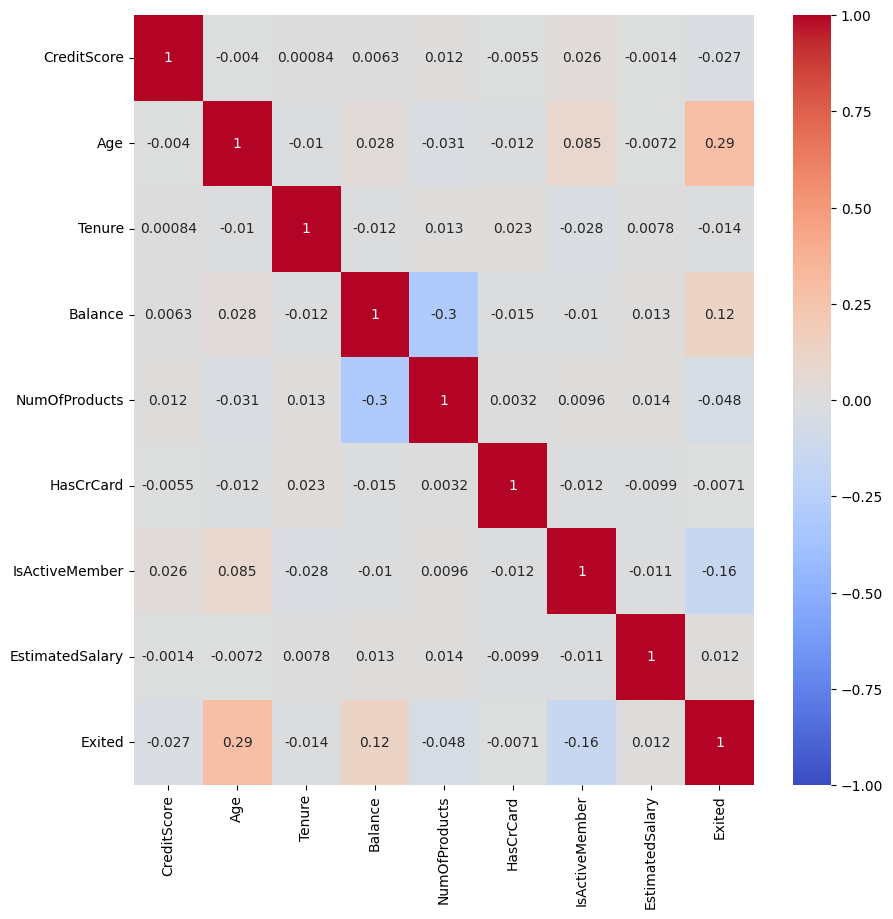

In [63]:
plt.figure(figsize = (10, 10))

correlation = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis = 1).corr()
sb.heatmap(correlation, annot = True, cmap='coolwarm', vmin = -1, vmax = 1)

Analisando os valores de correlação de cada atributo com a variável-alvo (*Exited*), não se observa nenhuma correlação significativa. A coluna que aparenta ser mais relevante para determinar o valor da variável-alvo é a idade dos clientes, mas, mesmo essa, não apresenta um coeficiente de correlação próximo de 1 (nem de -1). Assim, conclui-se que nenhuma variável, por si só, é suficientemente forte para determinar se um cliente irá, ou não, sair do banco, sendo necessário, para proceder a tal classificação, considerar/combinar os valores de várias váriaveis.

Assim, as conclusões retiradas da exploração dos dados levaram a alterações às suposições iniciais e à formulação de novas hipóteses, mas também a algumas confirmações.

Por um lado, parece que, afinal, o género, a idade e a nacionalidade poderão ter papéis mais importantes do que se pensava inicialmente na classificação dos clientes, dado que se mostrou que o género feminino abandona mais o banco do que o género masculino, que a nacionalidade alemã é aquela que tem mais propensão a terminar a sua ligação com o banco e que isto ocorre, maioritariamente, nas faixas etárias próximas dos 50 anos. Por outro lado, o ter, ou não, cartão de crédito não se demonstrou, de todo, relevante para o processo de classificação, enquanto o número de produtos mostrou-se com relevância, mas, afinal, no sentido inverso: os clientes que abandonam o banco são, por norma, aqueles que têm mais de dois produtos subscritos. No entanto, manteve-se e confirmou-se a ideia de que ser um membro ativo é um fator importante para um cliente permanecer ligado ao banco.

Para análises futuras, os atributos que parecem ser mais relevantes são a pontuação de crédito, a geografia, o género, a idade, o número de produtos e o ser (ou não) um membro ativo do banco. No sentido inverso, para além das colunas *RowNumber*, *CustomerId* e *Surname*, já consideradas irrelevantes, os atributos *Tenure*, *Balance*, *HasCrCard* e *EstimatedSalary* poderão não ser tão importantes como seria de esperar.

Na verdade, não se verificou qualquer correlação significativa entre alguma coluna e o valor da variável-alvo, pelo que não se espera que nenhuma variável seja preponderante para a classificação binária a efetuar.

Em suma, a exploração dos dados, ao permitir aprofundar conhecimento sobre os mesmos e formular novas hipóteses, diferentes das anteriormente teorizadas, permite manter os objetivos estipulados inicialmente e continuar para as fases seguintes com confiança de que os mesmos poderão vir a ser atingidos com sucesso.

## 3. Preparação dos Dados

### Seleção

De acordo com as conclusões retiradas nas secções anteriores, devem ser excluídas do *dataset* as colunas consideradas irrelevantes: *RowNumber*, *CustomerId* e *Surname*.

In [18]:
selected_data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

selected_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Assim, apenas pertencem ao novo *dataset* os atributos que podem ser relevantes para os objetivos definidos inicialmente: *CreditScore*, *Geography*, *Gender*, *Age*, *Tenure*, *Balance*, *NumOfProduct*, *HasCrCard*, *IsActiveMember*, *EstimatedSalary* e *Exited* (variável-alvo), não havendo restrições na utilização de nenhuma coluna.

### Limpeza

Tendo em conta que, conforme determinado anteriormente, não existem dados em falta, nem erros nos dados, nem inconsistências de codificação, os dados selecionados já se encontram limpos (sem ruído), pelo que não é necessária nenhuma limpeza adicional.

In [19]:
clean_data = selected_data

### Construção

Como os dados já existentes são, em quantidade e em qualidade, suficientes para o modelo a desenvolver efetuar a classificação binária pretendida, não se afigura necessário derivar novos atributos a partir dos já existentes.

### Transformação

Nesta etapa, compete-nos confirmar se os tipos de dados das colunas são adequados para o desenvolvimento do modelo (por exemplo, numéricos para quantidades e categóricos para classificações). Caso não sejam, é necessário fazer a conversão para o tipo de dados correto.

In [20]:
clean_data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

No *output* do código acima, *int64* significa um número inteiro de 64 *bits*, *float64* corresponde a um número de vírgula flutuante representado com 64 *bits* e *object* é um tipo de dados que contém *strings*.

*CreditScore*, *Age*, *Tenure* e *NumOfProducts* são variáveis quantitativas discretas, pelo que o tipo *int64* é adequado.

*Balance* e *EstimatedSalary* são dados quantitativos contínuos, pelo que o tipo *float64* está apropriado.

*Geography* e *Gender* são variáveis qualitativas categóricas, pelo que *object* é o tipo correto para as representar. Contudo, para permitir a análise por parte dos algoritmos de *machine learning*, estas colunas devem ser codificadas em valores numéricos.

*HasCrCard*, *IsActiveMember* e *Exited*, ao serem variáveis booleanas e, por isso, binárias, podem ser consideradas quantitativas discretas, pelo que podem ser representadas pelo tipo *int64*, como atualmente se encontram.

In [21]:
clean_data = pd.get_dummies(clean_data, drop_first = True, dtype = int)

clean_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
clean_data.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int32
Geography_Spain        int32
Gender_Male            int32
dtype: object

Deste modo, os dados estão, finalmente, prontos para servirem de treino e teste do modelo.

## 4. Modelação

### Escolha dos Algoritmos

Em primeiro lugar, desenvolvemos um modelo de classificação baseado numa **Árvore de Decisão**. Tendo em conta que a variável-alvo é categórica, pelo que este é um problema de classificação e o objetivo do modelo é classificar registos, tomando decisões a partir dos atributos de cada cliente, este algoritmo considera-se adequado para o efeito.

Em segundo lugar, implementamos uma **Rede Neuronal**, que é um modelo de *deep learning* com capacidade para aprender a partir dos dados, sendo capaz de identificar padrões complexos e de fazer previsões precisas.

Em terceiro lugar, criamos um modelo com base em ***K-Nearest Neighbors*** (K-NN). Este é um algoritmo que classifica novos dados através da sua proximidade em relação aos dados já existentes, tendo em consideração as classes dos *k* vizinhos mais próximos.

Para além disto, construímos um modelo de classificação assente numa ***Support Vector Machine*** (SVM). Esta abordagem tenta encontrar o hiperplano que melhor separa os registos das diferentes classes, maximizando a margem entre esse hiperplano e os registos das duas classes.

Por último, apresentamos um ***Random Forest Classifier***, que, sendo um modelo de *ensembling*, combina várias árvores de decisão para melhor classificar os dados.

### *Design* do Teste

Todos os modelos devem ser treinados com um conjunto de dados de treino e testados num conjunto de dados de teste. Assim, é necessário dividir o *dataset* nestes dois conjuntos, de forma aleatória.

In [96]:
all_inputs = clean_data.drop(['Exited'], axis = 1)

all_labels = clean_data['Exited']

(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size = 0.25, random_state = 13)

A variável `all_inputs` contém os valores dos atributos para todas as linhas do *dataset*, excluindo os valores da coluna *Exited*. A variável `all_labels` contém o valor que a variável-alvo *Exited* assume em cada uma das linhas correspondentes do *dataset*.

A função `train_test_split` divide os dados em conjuntos de treino e de teste, fazendo com que o conjunto de teste corresponda a 25% do *dataset* inicial, ou seja, contenha 2500 linhas.

Para a construção de alguns modelos, como a rede neuronal, o *k-nearest neighbors* e o *support vector machine*, é necessário normalizar os dados de maneira a que tenham média 0 e variância 1, aplicando este processo ao conjunto de treino e ao conjunto de teste.

In [97]:
scaler = StandardScaler()

training_inputs_scaled = scaler.fit_transform(training_inputs)

testing_inputs_scaled = scaler.transform(testing_inputs)

In [98]:
exited_labels = clean_data['Exited']

np.unique(exited_labels, return_counts = True)

(array([0, 1], dtype=int64), array([7963, 2037], dtype=int64))

Como é possível verificar, existe um desequilíbrio nos dados, dado que a variável-alvo (*Exited*) divide os clientes em dois grupos desiguais: um com cerca de 2000 clientes e outro com cerca de 8000. Este desequilíbrio pode levar a que os modelos desenvolvidos tenham uma tendência para classificar os clientes como pertencentes ao grupo maioritário, o que não é desejável.

Assim, em todos os casos, com exceção da rede neuronal, para melhorar os resultados obtidos no processo de afinação de parâmetros por *Grid Search* e para evitar flutuações dos resultados devido à divisão aleatória dos dados em conjunto de treino e teste, recorrer-se-á a *cross-validation*. Assim, dividem-se os dados em *k* subconjuntos, usa-se um dos subconjuntos como conjunto de teste e os restantes como conjunto de treino, repetindo este processo *k* vezes, mas garantindo que cada subconjunto só é considerado como conjunto de teste uma única vez. Neste caso, considera-se *k* = 10 e realiza-se *stratified cross-validation*, de modo que a proporção da variável-alvo se mantenha constante em cada um dos subconjuntos gerados.

In [99]:
cross_validation = StratifiedKFold(n_splits = 10)

### Construção do Modelo - Árvore de Decisão

In [103]:
decision_tree = DecisionTreeClassifier(random_state = 13)

decision_tree.fit(training_inputs, training_classes)

decision_tree_accuracy = decision_tree.score(testing_inputs, testing_classes)
print('Decision Tree Accuracy: {:.2f}%'.format(decision_tree_accuracy * 100))

Decision Tree Accuracy: 78.72%


Uma simples árvore de decisão treinada e testada com os conjuntos respetivos consegue alcançar uma exatidão de cerca de 79%, sem proceder a qualquer afinação de parâmetros. 

### Afinação dos Parâmetros - Árvore de Decisão

É necessário descobrir os melhores parâmetros para este modelo.

Para isso, utiliza-se uma *Grid Search*, isto é, explora-se um dado intervalo de parâmetros de maneira a encontrar a melhor combinação entre eles.

In [111]:
decision_tree_parameter_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

decision_tree_grid_search = GridSearchCV(decision_tree, decision_tree_parameter_grid, cv = cross_validation, n_jobs = -1)

decision_tree_grid_search.fit(training_inputs, training_classes)

print('Decision Tree Best Score: {:.2f}%'.format(decision_tree_grid_search.best_score_ * 100))
print('Decision Tree Best Parameters:', decision_tree_grid_search.best_params_)

Decision Tree Best Score: 85.81%
Decision Tree Best Parameters: {'max_depth': 7, 'max_features': 8}


Deste modo, ao afinar os parâmetros, atinge-se uma precisão de 86%, aproximadamente.

In [166]:
best_decision_tree_params = decision_tree_grid_search.best_params_
best_decision_tree = DecisionTreeClassifier(max_depth = best_decision_tree_params['max_depth'], max_features = best_decision_tree_params['max_features'], random_state = 13)
best_decision_tree.fit(training_inputs, training_classes)
best_decision_tree.score(testing_inputs, testing_classes)

0.8568

### Construção do Modelo - Rede Neuronal

In [113]:
neural_network = MLPClassifier(max_iter = 1000, random_state = 13)

neural_network.fit(training_inputs_scaled, training_classes)

neural_network_accuracy = neural_network.score(testing_inputs_scaled, testing_classes)
print('Neural Network Accuracy: {:.2f}%'.format(neural_network_accuracy * 100))

Neural Network Accuracy: 85.48%


Nesta secção, implementa-se um modelo baseado numa rede neuronal - um perceptrão com várias camadas.

A exatidão obtida ronda os 85%, embora este valor possa variar ligeiramente de execução para execução, refletindo pequenas variações na inicialização aleatória dos pesos do modelo.

### Afinação dos Parâmetros - Rede Neuronal

Há diversos parâmetros que podem ser especificados para substituir os valores padrão.

De acordo com a bibliografia consultada, existem três regras que podem ser consideradas como ponto de partida para determinar um número aceitável de neurónios a utilizar nas camadas ocultas da rede neuronal:
1. O número de neurónios ocultos devem estar entre o tamanho da camada de *input* e o tamanho da camada de *output*.
2. O número de neurónios ocultos deve ser 2/3 do tamanho da camada de *input*, mais o tamanho da camada de *output*.
3. O número de neurónios ocultos deve ser menos do dobro do tamanho da camada de *input*.

Assim, como a camada de *input* tem 11 nós (um nó por cada coluna/atributo utilizado) e a camada de *output* tem apenas um nó (por ser um classificador binário), testam-se diferentes combinações dos parâmetros possíveis e procura-se a melhor através de uma *Grid Search*.

In [114]:
neural_network_parameter_grid = {
    'hidden_layer_sizes': [(5, ), (6, ), (7, ), (5, 4), (5, 5), (6, 4), (6, 5), (6, 6)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
}

neural_network_grid_search = GridSearchCV(neural_network, neural_network_parameter_grid, n_jobs = -1)

neural_network_grid_search.fit(training_inputs_scaled, training_classes)

print('Neural Network Best Score: {:.2f}%'.format(neural_network_grid_search.best_score_ * 100))
print('Neural Network Best Parameters:', neural_network_grid_search.best_params_)

Neural Network Best Score: 86.23%
Neural Network Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (6,), 'solver': 'lbfgs'}


Conclui-se que a exatidão não sofre alterações relevantes com a variação dos parâmetros, melhorando ligeiramente (de 85% para 86%) em relação àquela que foi obtida com os valores padrão utilizados anteriormente.

In [218]:
best_neural_network_params = neural_network_grid_search.best_params_
best_neural_network = MLPClassifier(hidden_layer_sizes = best_neural_network_params['hidden_layer_sizes'], activation = best_neural_network_params['activation'], solver = best_neural_network_params['solver'], random_state = 13)
best_neural_network.fit(training_inputs_scaled, training_classes)
best_neural_network.score(testing_inputs_scaled, testing_classes)

0.8668

### Construção do Modelo - *K-Nearest Neighbors*

In [115]:
knn = KNeighborsClassifier()

knn.fit(training_inputs_scaled, training_classes)

knn_accuracy = knn.score(testing_inputs_scaled, testing_classes)
print('K-Nearest Neighbors Accuracy: {:.2f}%'.format(knn_accuracy * 100))

K-Nearest Neighbors Accuracy: 82.76%


Para implementar *K-Nearest Neighbors*, é necessário utilizar os dados normalizados, dado que diferenças significativas na ordem de grandeza das variáveis implicam um desempenho inadequado do modelo, pois valores numericamente maiores iriam, naturalmente, dominar o cálculo da distância entre os pontos no espaço.

Assim, o modelo K-NN, sem qualquer afinação de parâmetros, consegue atingir uma precisão de cerca de 83%.

### Afinação dos Parâmetros - *K-Nearest Neighbors*

Nos cálculos anteriores, é usado o valor de *k* = 5, que é o valor padrão, mas é possível criar o modelo com outros valores, tanto para o valor de *k*, como para o cálculo da distância e também para a função peso, tentando encontrar a melhor combinação de parâmetros para o modelo através de uma *Grid Search*.

In [116]:
knn_parameter_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(knn, knn_parameter_grid, cv = cross_validation, n_jobs = -1)

knn_grid_search.fit(training_inputs_scaled, training_classes)

print('K-Nearest Neighbors Best Score: {:.2f}%'.format(knn_grid_search.best_score_ * 100))
print('K-Nearest Neighbors Best Parameters:', knn_grid_search.best_params_)


K-Nearest Neighbors Best Score: 83.61%
K-Nearest Neighbors Best Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


Deste modo, ao afinar os parâmetros, consegue-se uma precisão de 84%.

In [169]:
best_knn_params = knn_grid_search.best_params_
best_knn = KNeighborsClassifier(n_neighbors = best_knn_params['n_neighbors'], weights = best_knn_params['weights'], metric = best_knn_params['metric'])
best_knn.fit(training_inputs_scaled, training_classes)
best_knn.score(testing_inputs_scaled, testing_classes)

0.8352

### Construção do Modelo - *Support Vector Machine*

In [117]:
svm = SVC(random_state = 13)

svm.fit(training_inputs_scaled, training_classes)

svm_accuracy = svm.score(testing_inputs_scaled, testing_classes)
print('Support vector Machine Accuracy: {:.2f}%'.format(svm_accuracy * 100))

Support vector Machine Accuracy: 85.48%


Ao implementar um modelo *Support Vector Machine*, utilizando os dados normalizados, obtém-se uma exatidão de cerca de 85%, sem afinar parâmetros.

### Afinação dos Parâmetros - *Support Vector Machine*

In [122]:
svm_parameter_grid = {
    'C': [0.9, 1.0, 1.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm, svm_parameter_grid, cv = cross_validation, n_jobs = -1)

svm_grid_search.fit(training_inputs_scaled, training_classes)

print("Support Vector Machine Best Score: {:.2f}%".format(svm_grid_search.best_score_ * 100))
print("Support Vector Machine Best Parameters:", svm_grid_search.best_params_)

Support Vector Machine Best Score: 85.61%
Support Vector Machine Best Parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


Depois de afinar os parâmetros, atinge-se uma exatidão de 86%, valor ligeiramente acima do obtido anteriormente.

In [180]:
best_svm_params = svm_grid_search.best_params_
best_svm = SVC(C = best_svm_params['C'], kernel = best_svm_params['kernel'], gamma = best_svm_params['gamma'], random_state = 13)
best_svm.fit(training_inputs_scaled, training_classes)
best_svm.score(testing_inputs_scaled, testing_classes)

0.8548

### Construção do Modelo - *Random Forest*

In [173]:
random_forest = RandomForestClassifier(random_state = 13)

random_forest.fit(training_inputs, training_classes)

random_forest_accuracy = random_forest.score(testing_inputs, testing_classes)
print('Random Forest Accuracy: {:.2f}%'.format(random_forest_accuracy * 100))

Random Forest Accuracy: 86.36%


Finalmente, constrói-se um modelo de *ensembling*: *Random Forest*, que consiste num conjunto de árvores de decisão. 

Sem afinação de parâmetros, este modelo alcança uma exatidão de 86%.

### Afinação dos Parâmetros - *Random Forest*

In [203]:
random_forest_parameter_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [30, 40],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['log2', 'sqrt']
}

random_forest_grid_search = GridSearchCV(random_forest, random_forest_parameter_grid, cv = cross_validation, n_jobs = -1)

random_forest_grid_search.fit(training_inputs, training_classes)

print('Random Forest Best Score: {:.2f}%'.format(random_forest_grid_search.best_score_ * 100))
print('Random Forest Best Parameters:', random_forest_grid_search.best_params_)

Random Forest Best Score: 86.52%
Random Forest Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


Afinados os parâmetros, o modelo de *Random Forest* consegue 87% de exatidão.

In [205]:
best_random_forest_params = random_forest_grid_search.best_params_
best_random_forest = RandomForestClassifier(n_estimators = best_random_forest_params['n_estimators'], max_depth = best_random_forest_params['max_depth'], min_samples_split = best_random_forest_params['min_samples_split'], min_samples_leaf = best_random_forest_params['min_samples_leaf'], max_features = best_random_forest_params['max_features'])
best_random_forest.fit(training_inputs, training_classes)
best_random_forest.score(testing_inputs, testing_classes)

0.8676

## 5. Avaliação

### Avaliação dos Resultados

Finalmente, devem avaliar-se os diferentes modelos desenvolvidos através de uma análise comparativa dos resultados obtidos.

Nesse sentido, a tabela abaixo apresenta o valor da exatidão resultante de cada modelo implementado, de maneira a facilitar a visualização.

| Modelo | Exatidão |
| ------ | -------- |
| **Árvore de Decisão** | 86% |
| **Rede Neuronal** | 86% |
| ***K-Nearest Neighbors*** | 84% |
| ***Support Vector Machine*** | 86% |
| ***Random Forest*** | 87% |

Em complemento à tabela, apresenta-se também um diagrama de caixa e bigodes com as exatidões dos modelos.

Text(0.5, 1.0, 'Accuracy')

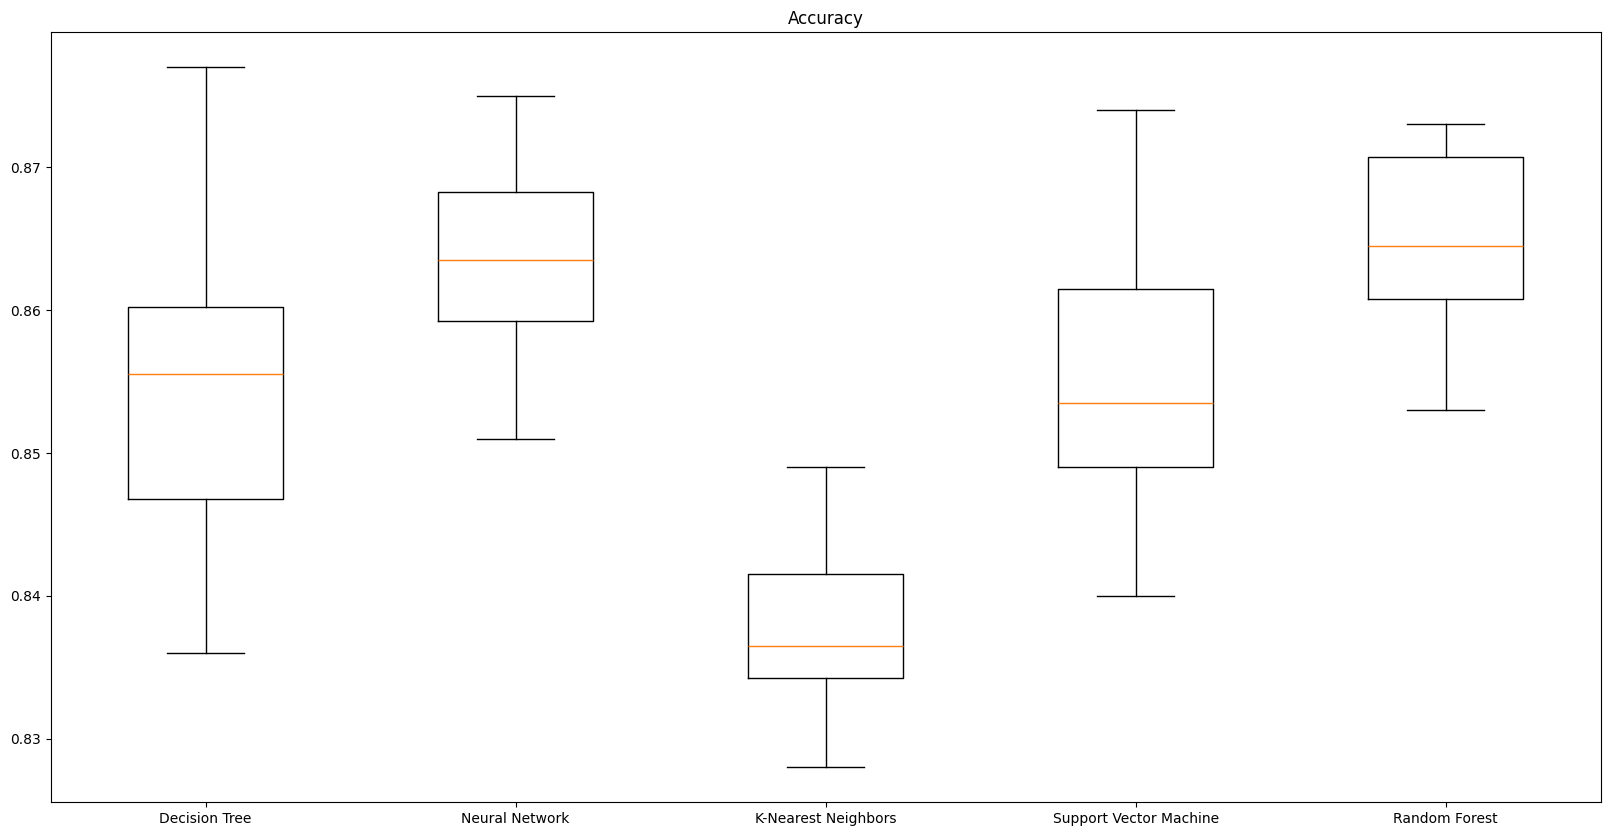

In [268]:
models = [best_decision_tree, best_neural_network, best_knn, best_svm, best_random_forest]
labels = ['Decision Tree', 'Neural Network', 'K-Nearest Neighbors', 'Support Vector Machine', 'Random Forest']
accuracies = []

for model in models:
    pipeline = make_pipeline(scaler, model)
    accuracy = cross_val_score(pipeline, all_inputs, all_labels, cv = cross_validation)
    accuracies.append(accuracy)

plt.figure(figsize = (20, 10))
plt.boxplot(accuracies, labels = labels)
plt.title('Accuracy')

Ao observar os elementos acima e comparar os valores obtidos, verifica-se que todos eles são muito próximos, pelo que, para decidir qual o melhor modelo, pode retirar-se mais métricas de avaliação a partir da matriz de confusão de cada modelo e compará-las, nomeadamente a precisão, *f1-score* e *recall*.

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      1984
           1       0.80      0.41      0.54       516

    accuracy                           0.86      2500
   macro avg       0.83      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500



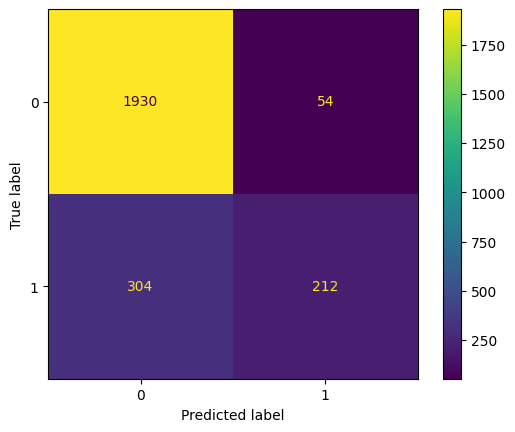

In [211]:
best_decision_tree_pred = best_decision_tree.predict(testing_inputs)

print(classification_report(testing_classes, best_decision_tree_pred))

best_decision_tree_confusion_matrix = confusion_matrix(testing_classes, best_decision_tree_pred)
ConfusionMatrixDisplay(best_decision_tree_confusion_matrix).plot()

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1984
           1       0.78      0.49      0.60       516

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



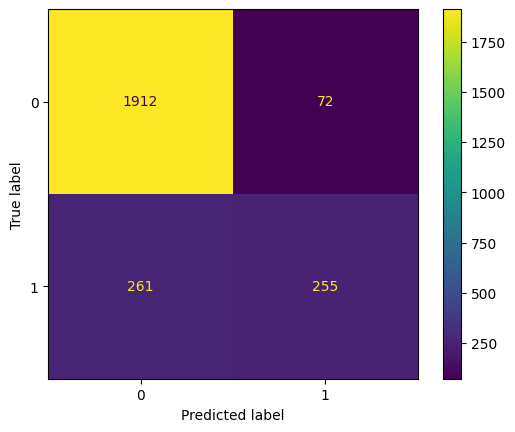

In [212]:
best_neural_network_pred = best_neural_network.predict(testing_inputs_scaled)

print(classification_report(testing_classes, best_neural_network_pred))

best_neural_network_confusion_matrix = confusion_matrix(testing_classes, best_neural_network_pred)
ConfusionMatrixDisplay(best_neural_network_confusion_matrix).plot()

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1984
           1       0.76      0.29      0.42       516

    accuracy                           0.84      2500
   macro avg       0.80      0.63      0.66      2500
weighted avg       0.83      0.84      0.80      2500



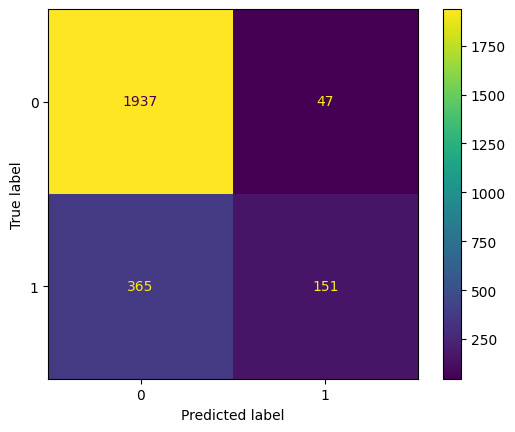

In [213]:
best_knn_pred = best_knn.predict(testing_inputs_scaled)

print(classification_report(testing_classes, best_knn_pred))

best_knn_confusion_matrix = confusion_matrix(testing_classes, best_knn_pred)
ConfusionMatrixDisplay(best_knn_confusion_matrix).plot()

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1984
           1       0.83      0.37      0.51       516

    accuracy                           0.85      2500
   macro avg       0.84      0.68      0.71      2500
weighted avg       0.85      0.85      0.83      2500



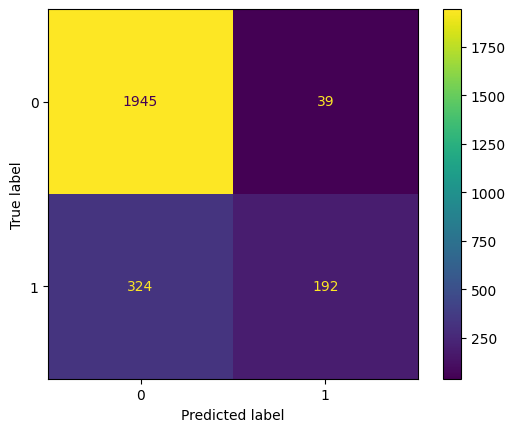

In [214]:
best_svm_pred = best_svm.predict(testing_inputs_scaled)

print(classification_report(testing_classes, best_svm_pred))

best_svm_confusion_matrix = confusion_matrix(testing_classes, best_svm_pred)
ConfusionMatrixDisplay(best_svm_confusion_matrix).plot()

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1984
           1       0.81      0.44      0.57       516

    accuracy                           0.86      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500



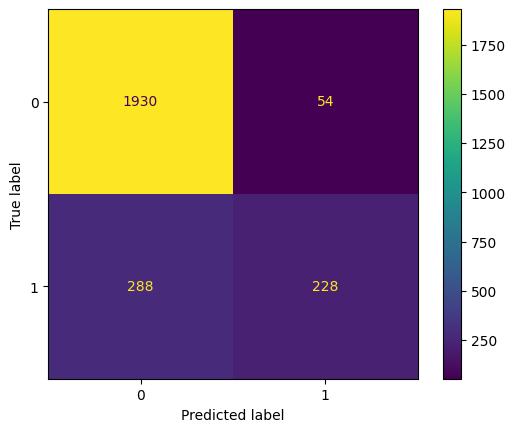

In [269]:
best_random_forest_pred = best_random_forest.predict(testing_inputs)

print(classification_report(testing_classes, best_random_forest_pred))

best_random_forest_confusion_matrix = confusion_matrix(testing_classes, best_random_forest_pred)
ConfusionMatrixDisplay(best_random_forest_confusion_matrix).plot()

Assim, é possível acrescentar à tabela anterior mais informação útil para extrair conclusões.

| Modelo | Exatidão | Precisão | *Recall* | *F1-Score* |
| ------ | -------- | -------- | -------- | ---------- |
| **Árvore de Decisão** | 86% | 85% | 86% | 84% |
| **Rede Neuronal** | 86% | 86% | 87% | 85% |
| ***K-Nearest Neighbors*** | 84% | 83% | 84% | 80% |
| ***Support Vector Machine*** | 86% | 85% | 86% | 83% |
| ***Random Forest*** | 87% | 86% | 86% | 85% |

Deste modo, é possível comparar de forma mais concreta e informada os cinco modelos implementados.

Numa análise global, constata-se facilmente que o modelo *K-Nearest Neighbors* foi aquele que teve pior desempenho em todas as métricas, em comparação com os restantes modelos.

Para comparar os restantes quatro modelos, convém esclarecer quais as métricas mais relevantes para o problema em questão. 

Globalmente, a exatidão - enquanto métrica que determina a correção global do modelo em classificar os dados, isto é, mede a frequência com que o modelo está certo - é o valor mais significativo para a comparação. Logo, o modelo que é considerado o melhor é o *Random Forest*, por ter a maior exatidão.

Em segundo lugar, tendo em conta que, no contexto dos objetivos do tema, é extremamente importante determinar corretamente os clientes que vão abandonar o banco (para intervir sobre eles no sentido de os manter), ainda que se identifiquem erradamente alguns clientes que não estão em vias de abandonar o banco, o *recall* é considerada a segunda métrica mais importante. Neste sentido, para os restantes três modelos com a mesma exatidão (86%), prefere-se a rede neuronal, por ter obtido o valor mais elevado de *recall*.

Finalmente, entre a árvore de decisão e o *SVM*, observa-se que ambos têm a mesma precisão, mas o primeiro tem um *F1-Score* ligeiramente superior, pelo que é considerado mais útil como modelo preditivo de classificação.

Com isto, é possível ordenar os cinco modelos tendo em conta o seu desempenho nas métricas avaliadas, do melhor para o pior:
1. *Random Forest*
2. Rede Neuronal
3. Árvore de Decisão
4. *Support Vector Machine*
5. *K-Nearest Neighbors*

Em geral, considera-se que os objetivos estabelecidos inicialmente foram cumpridos com sucesso, dado que o melhor modelo tem uma exatidão superior a 85%, pelo que é admissível a sua viabilidade prática.

Em particular, estes resultados tendem a coincidir com os esperados, tendo em conta que o *Random Forest*, enquanto modelo de *ensembling* que agrupa várias árvores de decisão, apresenta um desempenho superior aos restantes modelos, o que é coerente com o facto de uma árvore de decisão, por si só, também retornar resultados melhores do que os outros modelos, com exceção da rede neuronal. A par disto, a vantagem da rede neuronal em relação aos restantes pode ser explicada não só por esta abordagem ter uma maior complexidade, mas também por não parecer haver uma distribuição espacial dos clientes com base nos seus atributos que tenha algum significado relevante (como é vísivel na *performance* do *SVM* e do *KNN*).

Efetivamente, os valores obtidos vão ao encontro dos resultados dos modelos de referência implementados no *Kaggle*, não ficando atrás de nenhuma implementação *online*, mas sim igualando algumas e superando outras.

### Revisão

Avaliados os resultados, está quase concluído todo o processo subjacente ao projeto de *maching learning*, pelo que se torna oportuno e adequado refletir sobre o trabalho desenvolvido, sumarizando as atividades e decisões tomadas em cada uma das cinco fases.

(1) Na compreensão do tema, estabeleceram-se os objetivos do mesmo, definiu-se o problema e estipularam-se também os objetivos do modelo a desenvolver. Esta etapa foi fundamental para, de forma sucinta, não só clarificar o âmbito do projeto, mas também o que era pretendido no final de todo o processo. Sendo esta uma fase simples, mas essencial, é fundamental que seja percorrida com a atenção necessária para tornar claro para todos aquilo que é esperado do projeto. Não houve eventos inesperados nem aspetos a melhorar identificados.

(2) A etapa de compreensão dos dados serviu para aumentar a familiarização com o *dataset* a tratar, através da recolha dos dados iniciais, da sua descrição e exploração, seguidas por uma verificação da qualidade dos mesmos. Neste sentido, foi possível compreender na totalidade o que significavam todos os atributos do domínio e, por meio de múltiplos gráficos e tabelas, como é que se relacionavam entre si. Refletindo sobre esta fase, nomeadamente sobre o momento de exploração dos dados, talvez, no futuro, possa ser gasto mais tempo a decidir quais os gráficos que efetivamente devem ser traçados, em vez de desenhar todos os gráficos e só depois tecer considerações sobre eles. Contudo, tendo sido este um primeiro contacto com a estatística descritiva sobre a forma de gráficos, configurou uma aprendizagem importante para trabalhos posteriores.

(3) A parte de preparação dos dados foi destinada à seleção dos dados, à limpeza dos mesmos e à construção de novos, bem como à transformação do *dataset* limpo. Este processo contribuiu de forma decisiva para que todos os modelos a desenvolver na fase seguinte recebessem os dados prontos a utilizar, sem necessidade de nenhum tratamento adicional. Dada a simplicidade do *dataset* em questão, esta etapa mostrou-se menos trabalhosa do que o que seria expectável caso os dados tivessem pior qualidade. Assim, não houve casos complicados a tratar, pelo que todo o processo decorreu sem sobressaltos.

(4) Na fase de modelação - nuclear ao projeto desenvolvido - implementaram-se cinco modelos de classificação: *árvore de decisão*, *rede neuronal*, *k-nearest neighbors*, *support vector machine* e *random forest*. Para todos estes modelos selecionados, estabeleceu-se um *design* para teste. Após isto, cada um dos modelos foi construído, avaliado individualmente e, por último, foram afinados os seus parâmetros, tendo em vista a obtenção de melhores resultados. Evidentemente, esta etapa foi imprescindível para o sucesso do projeto. Em retrospetiva, o desequilíbrio dos dados poderia ter sido abordado de outra forma, não com *stratified cross-validation*, mas sim através de métodos de *oversampling*. Em trabalhos futuros, este talvez seja o ponto a ter em mais atenção, dado que a construção dos modelos foi bem conseguida e os mesmos alcançaram resultados dentro dos previstos, mas talvez pudessem ser ainda melhores.

(5) Neste último momento de avaliação global, compararam-se os resultados obtidos pelos diferentes modelos, com a finalidade de identificar aquele que mais se aproxima dos objetivos estipulados inicialmente. Considera-se que a avaliação/comparação foi um sucesso, pois foram analisadas várias métricas e foi explicada a sua relevância para o problema a tratar. Como, surpreendentemente, não houve diferenças significativas entre os modelos implementados na fase anterior, foi necessário recorrer a ligeiras diferenças nos resultados obtidos para conseguir ordenar os modelos quanto à sua utilidade e desempenho, o que serviu, também, como aprendizagem sobre conceitos importantes de *machine learning*.

### Próximos Passos

Finalizados os processos de avaliação e revisão, indicam-se algumas direções passíveis de serem seguidas no futuro, como continuação do trabalho desenvolvido.

Tendo em conta que os resultados obtidos são satisfatórios, mas não ótimos (dado que a exatidão ainda pode aumentar), sugere-se que o próximo passo seja uma continuação/aprimoração do processo de modelação. Apesar de se considerar que, para os modelos implementados, as métricas de comparação estarão próximas do valor máximo possível, existem ainda outros modelos de classificação binária que podem ser experimentados, de modo a tentar encontrar algum que retorne ainda melhores resultados. A título de exemplo, poderão ser explorados mais modelos de *ensebling*, principalmente porque o único deste tipo implementado (*random forest*) foi aquele que devolveu melhores resultados, ainda que por uma ligeira margem.

Assim, dá-se por concluído o projeto.